## 

# Tuning Curves Playground Notebook

In [1]:
## Import Libraries:
# Mathematical / Numerical Libraries:
import numpy as np

# Plotting:
import matplotlib.pyplot as plt

# Type hinting:
from typing import List, Union, Tuple


## 1-D Gaussian Tuning Function

In [12]:
def gaussian(x: np.ndarray, mu: float, sigma: float) -> np.ndarray:
    """Creates a simple 1 dimensional Gaussian probability distribution

    Args:
        x (np.ndarray): A numpy array of points to evaluate the distribution at
        mu (float): The mean (centre point) of the distribution
        sigma (float): The stdev of the gaussian distribution

    Returns:
        np.ndarray: A numpy array representing the gaussian distribution evaluated at the input points x
    """
    return (np.exp(-((x - mu)**2) / (2 * sigma**2))) / (np.sqrt(2 *  np.pi) * sigma)


def gaussian_tuning_function(x: np.ndarray, mu: float, sigma: float, maxResponse: float=1, minResponse: float=0) -> np.ndarray:
    """Creates a shifted scaled Gaussian distribution

    Args:
        x (np.ndarray): A numpy array of points to evaluate at
        mu (float): The centre point of the distribution
        sigma (float): The stdev of the distribution
        maxResponse (float, optional): The maximum value of the response function. Defaults to 1.
        minResponse (float, optional): The minimum value of the response function. Defaults to 0.

    Returns:
        np.ndarray: A numpy array representing the gaussian distribution evaluated at the input points x
    """
    # compute gaussian PDF based on input:
    dist = gaussian(x, mu, sigma)
    
    # scale + shift to match min and max response range:
    dist = (dist/max(dist)) * (maxResponse - minResponse) + minResponse
    
    return dist


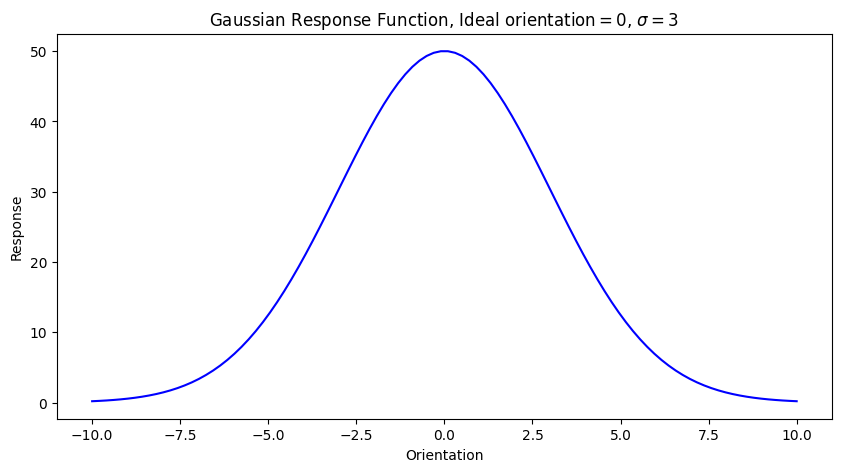

In [13]:
# Example for how this might represent the response of an individual neuron:
x: np.ndarray = np.linspace(-10, 10, 100)
maxResponse: int = 50
minResponse: int = 0
correctOrientation: int = 0
stdev: int = 3
response: np.ndarray = gaussian_tuning_function(x, correctOrientation, stdev, 50, 0)

# plotting the output:
fig: plt.Figure = plt.figure(figsize=(10,5))
plt.plot(x, response, '-', color="blue")
plt.xlabel(r"Orientation")
plt.ylabel(r"Neuron Response")
plt.title(fr"Gaussian Response Function, Ideal orientation$= {correctOrientation}$, $\sigma={stdev}$")
plt.show()